In [1]:
#Importação das bibliotecas que serão utilizadas para a análise do banco de dados "DEMO_PHQ" e "PAG_HEI".
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Aumentando o número de colunas e linhas que podem ser visualizadas de uma vez.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

#Leitura dos datasets.
demo_phq = pd.read_csv("../Bases de dados/DEMO_PHQ.csv", index_col = 0)
pag_hei = pd.read_csv("../Bases de dados/PAG_HEI.csv", index_col = 0)

# Patient Health Questionaire-9 (PHQ-9)

In [2]:
#Fazendo a leitura do Patient Health Questionaire-9 (PHQ-9), utilizado para avaliar o grau de depressão.
#Dentre os dados analisados, o mais importante é o score final, para avaliar o grau de sintomas da depressão.

demo_phq

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0


In [3]:
#Ao observamos as informações do DataSet "demo_phq", observamos que há 4836 valores não nulos.
#Ou seja, 90,66% dos entrevistados responderam à pesquisa, enquanto os 9,34% restantes não apresentam respostas.

demo_phq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DPQ010    4836 non-null   float64
 1   DPQ020    4836 non-null   float64
 2   DPQ030    4836 non-null   float64
 3   DPQ040    4836 non-null   float64
 4   DPQ050    4836 non-null   float64
 5   DPQ060    4836 non-null   float64
 6   DPQ070    4836 non-null   float64
 7   DPQ080    4836 non-null   float64
 8   DPQ090    4836 non-null   float64
 9   RIAGENDR  5334 non-null   int64  
 10  RIDAGEYR  5334 non-null   int64  
 11  RIDRETH1  5334 non-null   int64  
 12  DMDEDUC   5334 non-null   int64  
 13  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 625.1 KB


In [4]:
demo_phq.isnull().sum()

DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

In [5]:
#Temos 498 linhas com registros nulos. Como não podemos descartar esses dados, vamos substituí-los pelo número 9.
#Ou seja, considerar que as pessoas não souberam responder às perguntas. A renda vamos substituir por 77, com recusa.

demo_phq["DPQ010"].fillna(9.0, inplace = True)
demo_phq["DPQ020"].fillna(9.0, inplace = True)
demo_phq["DPQ030"].fillna(9.0, inplace = True)
demo_phq["DPQ040"].fillna(9.0, inplace = True)
demo_phq["DPQ050"].fillna(9.0, inplace = True)
demo_phq["DPQ060"].fillna(9.0, inplace = True)
demo_phq["DPQ070"].fillna(9.0, inplace = True)
demo_phq["DPQ080"].fillna(9.0, inplace = True)
demo_phq["DPQ090"].fillna(9.0, inplace = True)
demo_phq["INDFMINC"].fillna(77.0, inplace = True)
demo_phq.isnull().sum()

DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDEDUC     0
INDFMINC    0
dtype: int64

# Physical Activity Guidelines for Americans(PAGA)

In [6]:
#Fazendo a leitura do Physical Activity Guidelines for Americans (PAGA), com informações de exercícios físicos.
#Dentre os dados analisados, o mais importante é o grau de aderência ao Physical Activity Guideline (PAG).

pag_hei

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


In [7]:
#Verificando as informações do "pag_hei", 8549 dos 9424 entrevistados responderam efetivamente às questões

pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 31128 to 41474
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PAG_MINW                  7150 non-null   float64
 1   ADHERENCE                 7150 non-null   float64
 2   HEI2015C1_TOTALVEG        8549 non-null   float64
 3   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 4   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 5   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 6   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 7   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 8   HEI2015C7_TOTPROT         8549 non-null   float64
 9   HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 10  HEI2015C9_FATTYACID       8549 non-null   float64
 11  HEI2015C10_SODIUM         8549 non-null   float64
 12  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 13  HEI2015C12_SFAT           8549 non-null   float64
 14  HEI

In [8]:
pag_hei.isnull().sum()

PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

# Combinação do Banco de Dados

In [9]:
#Para efetuar a combinação de ambos os bancos "demo_phq" e "pag_hei", foi utilizada a função "pd.merge".
#Isso foi feito principalmente porque o index SEQN pode ser utilizado como uma chave para combinação dos valores.

SEQN = pd.merge(demo_phq, pag_hei, how = "inner", on = "SEQN")
SEQN

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31130,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


In [10]:
#Após a junção dos bancos, vamos criar a coluna "PHQ9", com a soma das questões sinalizadas como "DPQ".
#De forma a verificar se os valores batem, decidi fazer duas formas de verificação, sendo a primeira a soma de cada coluna.
#A segunda forma foi através da técnica de fatiamento das colunas. Ambos os resultados foram idênticos.

SEQN["PHQ9"] = SEQN["DPQ010"] + SEQN["DPQ020"] + SEQN["DPQ030"] + SEQN["DPQ040"] + SEQN["DPQ050"] + SEQN["DPQ060"] + SEQN["DPQ070"] + SEQN["DPQ080"] + SEQN["DPQ090"]
SEQN["PHQ9"]

SEQN
31130    81.0
31131     0.0
31132     0.0
31134     0.0
31139     4.0
         ... 
41466     2.0
41468    10.0
41469     2.0
41472     0.0
41473     4.0
Name: PHQ9, Length: 5334, dtype: float64

In [11]:
SEQN["PHQ9"] = SEQN.iloc[:, 0:9].sum(axis = 1)
SEQN["PHQ9"]

SEQN
31130    81.0
31131     0.0
31132     0.0
31134     0.0
31139     4.0
         ... 
41466     2.0
41468    10.0
41469     2.0
41472     0.0
41473     4.0
Name: PHQ9, Length: 5334, dtype: float64

In [12]:
#Após o resultado, armazenamos os valores registrados de toda a coluna dentro da variável "PHQ9".
#Isso irá facilitar o acesso aos dados futuramente em novas questões.

PHQ9 = SEQN["PHQ9"]
PHQ9

SEQN
31130    81.0
31131     0.0
31132     0.0
31134     0.0
31139     4.0
         ... 
41466     2.0
41468    10.0
41469     2.0
41472     0.0
41473     4.0
Name: PHQ9, Length: 5334, dtype: float64

In [13]:
#Agora visualizamos todas as colunas que fazem parte do nosso banco de dados, com o acréscimo da coluna "PHQ9".

SEQN.columns

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
       'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'PHQ9'],
      dtype='object')

In [14]:
#Precisamos criar uma coluna "PHQ_GRP", com a divisão dos grupos de pessoas conforme os sintomas de depressão. Sendo eles:
#(1) sem sintomas; (2) sintomas leves; (3) sintomas moderados; (4) sintomas moderadamente severos; (5) sintomas severos.

#Vamos criar uma lista de condições desses valores:

conditions = [
    (SEQN["PHQ9"] < 5),
    (SEQN["PHQ9"] >= 5) & (SEQN["PHQ9"] < 10),
    (SEQN["PHQ9"] >= 10) & (SEQN["PHQ9"] < 15),
    (SEQN["PHQ9"] >= 15) & (SEQN["PHQ9"] < 20),
    (SEQN["PHQ9"] >= 20)
]

#Agora vou criar uma lista inserindo os valores para cada condição acima:
values = [0, 1, 2, 3, 4]

#Criando uma coluna com o valor np.select para ajustar os valores:
SEQN["PHQ_GRP"] = np.select(conditions, values)

#Agora basta associarmos a variável:
PHQ_GRP = SEQN["PHQ_GRP"]
PHQ_GRP

SEQN
31130    4
31131    0
31132    0
31134    0
31139    0
        ..
41466    0
41468    2
41469    0
41472    0
41473    0
Name: PHQ_GRP, Length: 5334, dtype: int32

In [15]:
#Agora visualizamos todas as colunas que fazem parte do nosso banco de dados, com o acréscimo das colunas "PHQ9" e "PHQ_GRP".

SEQN.columns

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
       'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'PHQ9', 'PHQ_GRP'],
      dtype='object')

# EDA: Análise Univariada & Bivariada

In [16]:
#Após a junção dos datasets "demo_phq" e "pag_hei", retornamos aos 5334 registros do banco de dados.
#Vamos trabalhar em cima desses dois dados, avaliando principalmente as últimas duas colunas criadas.

SEQN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DPQ010                    5334 non-null   float64
 1   DPQ020                    5334 non-null   float64
 2   DPQ030                    5334 non-null   float64
 3   DPQ040                    5334 non-null   float64
 4   DPQ050                    5334 non-null   float64
 5   DPQ060                    5334 non-null   float64
 6   DPQ070                    5334 non-null   float64
 7   DPQ080                    5334 non-null   float64
 8   DPQ090                    5334 non-null   float64
 9   RIAGENDR                  5334 non-null   int64  
 10  RIDAGEYR                  5334 non-null   int64  
 11  RIDRETH1                  5334 non-null   int64  
 12  DMDEDUC                   5334 non-null   int64  
 13  INDFMINC                  5334 non-null   float64
 14  PAG

In [17]:
#Apenas 274 dos 5334 registros apresentam valores nulos. Ou seja, isso representa 5,14% da base.
#Considerei este um limite aceitável para efetuar a exclusão das linhas com valores nulos.

SEQN.isnull().sum()

DPQ010                        0
DPQ020                        0
DPQ030                        0
DPQ040                        0
DPQ050                        0
DPQ060                        0
DPQ070                        0
DPQ080                        0
DPQ090                        0
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                      0
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
PHQ9                          0
PHQ_GRP 

In [18]:
#Vamos excluir as 274 linhas que não apresentam informações sobre os hábitos alimentares e exercícios físicos.
#Neste primeiro momento, vamos criar a variável "SEQN_V1", que agrupa todos os registros da pesquisa.

SEQN_V1 = SEQN.dropna(axis = 0, how = "any")
SEQN_V1

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0


<AxesSubplot:xlabel='PHQ9'>

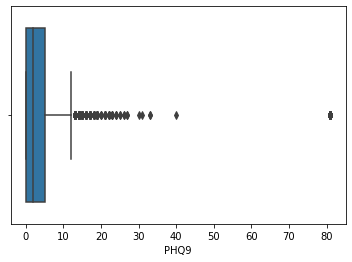

In [19]:
#De certa forma, já poderíamos iniciar a análise em cima do "SEQN_V1", mas primeiro vamos analisar os outliers.
#Como tratamos algumas questões das tabelas "DPQ###" com o valor 9, muitos dos outliers serão percebidos na tabela "PHQ9".

import warnings #Importação da biblioteca "Warnings" para remover alguns avisos chatos.
warnings.filterwarnings("ignore")

sns.boxplot(SEQN_V1["PHQ9"])

In [20]:
#Vamos tratar os outliers. Para isso, vamos utilizar o "np.quantile" para reduzir os valores distantes.
#Como não podemos excluir um grande volume de dados, vamos apenas manter a base como 0.025 e o teto como 0.975.

Q1 = SEQN_V1.quantile(0.025)
Q3 = SEQN_V1.quantile(0.975)
IQR = Q3 - Q1

SEQN_FINAL = SEQN_V1[~((SEQN_V1 < (Q1 - 1.5 * IQR)) |(SEQN_V1 > (Q3 + 1.5 * IQR))).any(axis=1)]
SEQN_FINAL

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0


<AxesSubplot:xlabel='PHQ9'>

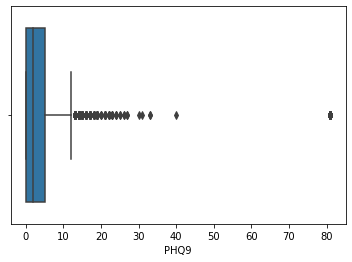

In [21]:
sns.boxplot(SEQN_FINAL["PHQ9"])

In [22]:
#Agora que já efetuamos a exclusão dos registros que possuiam dados nulos e também fizemos o tratamento dos outliers...
#... é hora de separarmos os grupos conforme a classificação da coluna "PHQ_GRP". Mas por que essa divisão?

#Quando fazemos a contagem dos valores dessa coluna, obtemos um alto volume de pessoas com classificação 0. Ou seja...
#... pessoas que NÃO apresentam sintomas, sejam eles leves ou graves, de depressão.

SEQN_FINAL["PHQ_GRP"].value_counts()

0    3722
1     691
4     357
2     204
3      77
Name: PHQ_GRP, dtype: int64

In [23]:
#Criação das variáveis e classificação dos grupos, conforme a classificação obtiva pela coluna "PHQ_GRP". Relembrando que...
#... (1) sem sintomas; (2) sintomas leves; (3) sintomas moderados; (4) sintomas moderadamente severos; (5) sintomas severos.

SEM_SINTOMAS = SEQN_FINAL[SEQN_FINAL.PHQ_GRP == 0]
SINTOMAS_LEVES = SEQN_FINAL[SEQN_FINAL.PHQ_GRP == 1]
SINTOMAS_MOD = SEQN_FINAL[SEQN_FINAL.PHQ_GRP == 2]
SINTOMAS_MODSV = SEQN_FINAL[SEQN_FINAL.PHQ_GRP == 3]
SINTOMAS_SV = SEQN_FINAL[SEQN_FINAL.PHQ_GRP == 4]

# Grupo 0: Sem Sintomas

In [24]:
#Agora que separamos esses grupos, vamos começar a analisar a correlação entre os hábitos das pessoas de cada grupo.
#O objetivo é começar a encontrar dados que possuam correlação direta e que comprovem os hábitos de cada variável.

#Com base nessa ideia, podemos começar a traçar algumas hipóteses que podem ou não serem confirmadas:
#1. As pessoas SEM SINTOMAS mantém hábitos mais saudáveis em relação aos demais?
#2. Os grupos com SINTOMAS MODERADOS, MODERADAMENTE SEVEROS e SEVEROS apresentam piores rendas?
#3. As pessoas mais afetadas pela depressão são mulheres?

SEM_SINTOMAS.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
count,3722.000000,3722.000000,3722.00000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3722.0
mean,0.095916,0.094035,0.27539,0.439817,0.116604,0.046212,0.069318,0.034927,0.004030,1.497851,45.069586,2.853305,3.326975,8.764643,487.717806,2.045137,3.239250,1.813876,2.543470,2.418032,1.805386,3.775655,4.457099,2.613894,4.726630,4.696220,5.820438,6.047284,6.313419,50.270654,1.176249,0.0
std,0.352653,0.311513,0.55125,0.609214,0.373610,0.228365,0.276324,0.223252,0.063363,0.500063,19.950779,1.110637,1.248387,11.608685,700.188497,0.914868,1.446786,2.141797,1.950237,2.173840,1.930051,1.593812,0.983501,2.174064,3.241822,3.405920,3.468851,3.184111,3.284009,12.436865,1.287108,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000,0.0
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,5.000000,55.427252,1.000000,2.103418,0.000000,0.502896,0.000000,0.000000,2.638529,4.253305,0.027260,2.032801,1.488316,2.985024,3.678756,3.888266,41.212684,0.000000,0.0
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,3.000000,3.000000,7.000000,238.452656,2.000000,3.254379,0.083705,2.419016,2.228476,1.066279,4.983031,5.000000,2.625243,4.432936,4.767202,6.227023,6.356375,6.946265,49.887285,1.000000,0.0
75%,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,11.000000,623.556582,3.000000,4.875076,4.542504,5.000000,5.000000,3.540088,5.000000,5.000000,5.000000,7.301790,7.567979,9.242017,9.002611,9.544188,58.572401,2.000000,0.0
max,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,85.000000,5.000000,9.000000,99.000000,6166.281755,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,4.000000,0.0


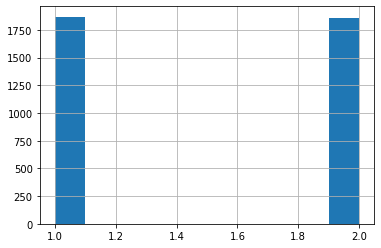

In [25]:
SEM_SINTOMAS.RIAGENDR.hist()
plt.show()

<AxesSubplot:>

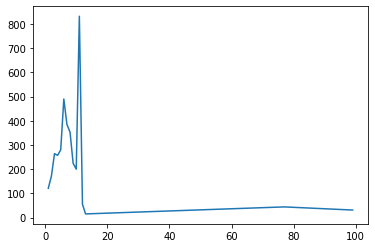

In [26]:
SEM_SINTOMAS["INDFMINC"].value_counts().sort_index().plot.line()

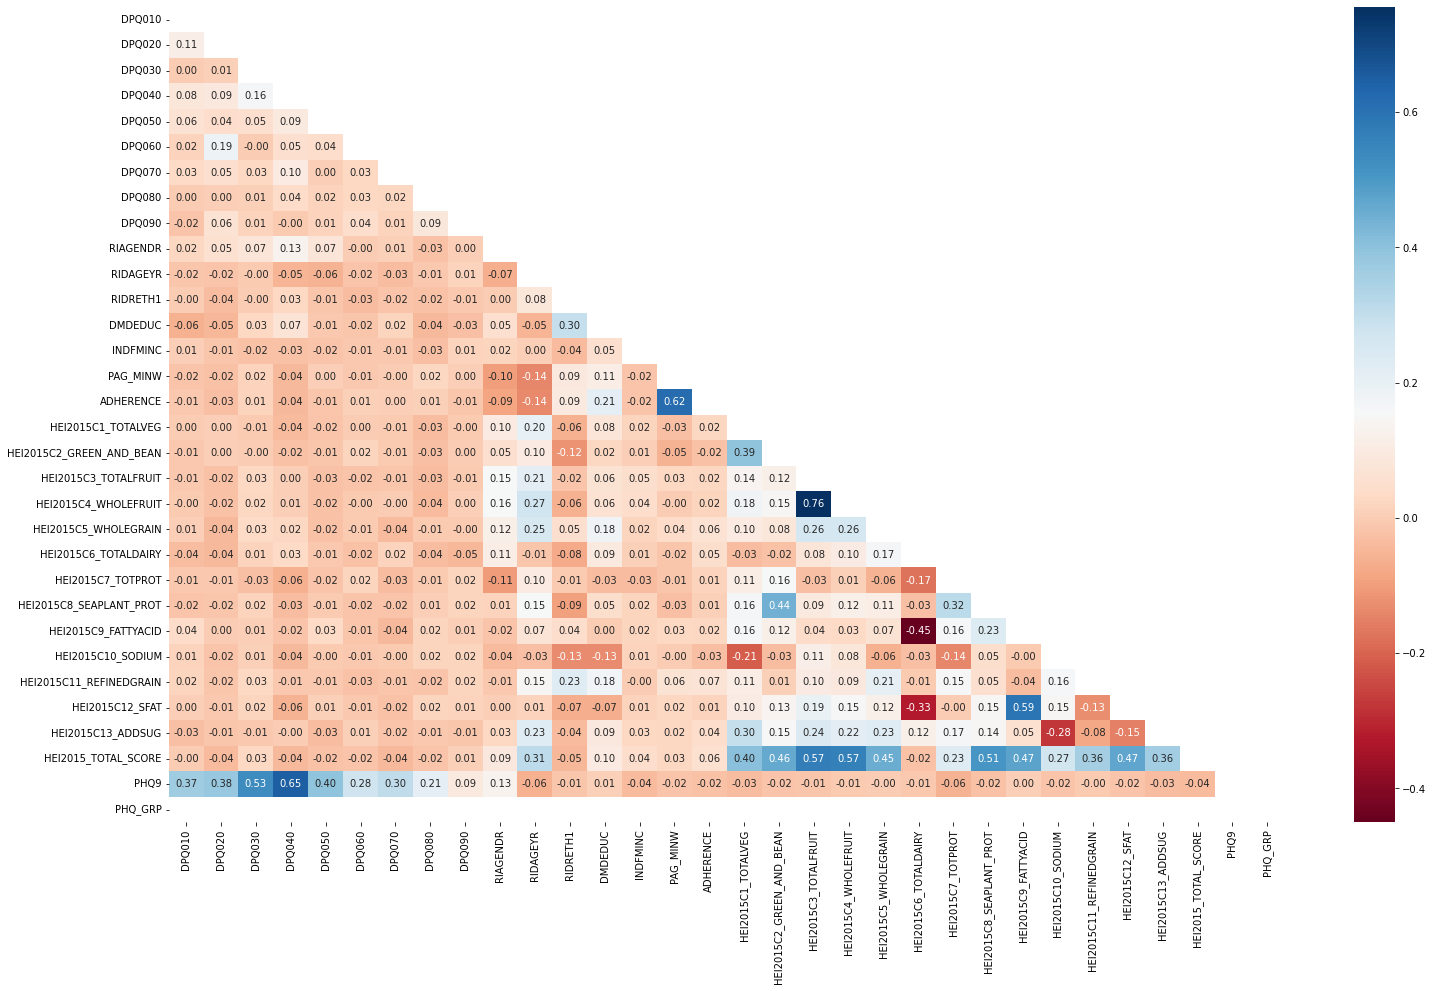

In [27]:
sns.set_context(font_scale = 3.0)
plt.figure(figsize = (25,15))
sns.heatmap(
    SEM_SINTOMAS.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(SEM_SINTOMAS.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

# Grupo 1: Sintomas Leves

In [28]:
SINTOMAS_LEVES.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.0
mean,0.775687,0.790159,1.256151,1.457308,0.804631,0.490593,0.520984,0.312590,0.085384,1.602026,43.221418,2.871201,3.131693,10.425470,451.645388,1.934877,3.082888,1.798289,2.295852,2.188808,1.695731,3.777899,4.327433,2.543413,4.699892,4.864672,5.700099,6.052422,5.945103,48.972501,6.493488,1.0
std,0.961755,0.809878,1.110987,0.925869,0.929879,0.706788,0.730739,0.595247,0.309189,0.489835,19.647367,1.126452,1.203266,17.840067,764.981233,0.921616,1.501609,2.116759,1.926598,2.155604,1.846026,1.591712,1.077349,2.145400,3.210496,3.407790,3.559612,3.120219,3.427188,11.979600,1.368762,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.491305,5.000000,1.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,3.000000,2.000000,4.000000,30.242494,1.000000,1.947485,0.000000,0.315765,0.000000,0.000000,2.601252,3.872341,0.000000,2.001802,1.710411,2.783768,3.864943,3.181574,40.514479,5.000000,1.0
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,40.000000,3.000000,3.000000,7.000000,192.424942,2.000000,3.082521,0.194401,1.978634,1.405451,1.001402,4.982176,5.000000,2.575660,4.458569,4.953294,6.170495,6.417463,6.629466,48.425057,6.000000,1.0
75%,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,58.000000,4.000000,4.000000,10.000000,503.879908,3.000000,4.565691,4.254427,4.371705,5.000000,3.082558,5.000000,5.000000,5.000000,7.149869,7.753671,9.355764,8.846782,9.126921,56.872944,8.000000,1.0
max,9.000000,9.000000,9.000000,3.000000,3.000000,9.000000,3.000000,3.000000,3.000000,2.000000,85.000000,5.000000,5.000000,99.000000,5847.575058,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,82.952626,9.000000,1.0


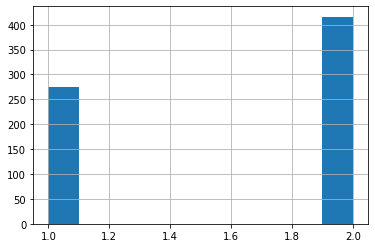

In [29]:
SINTOMAS_LEVES.RIAGENDR.hist()
plt.show()

<AxesSubplot:>

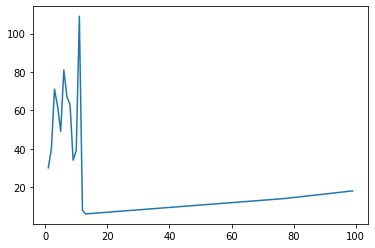

In [30]:
SINTOMAS_LEVES["INDFMINC"].value_counts().sort_index().plot.line()

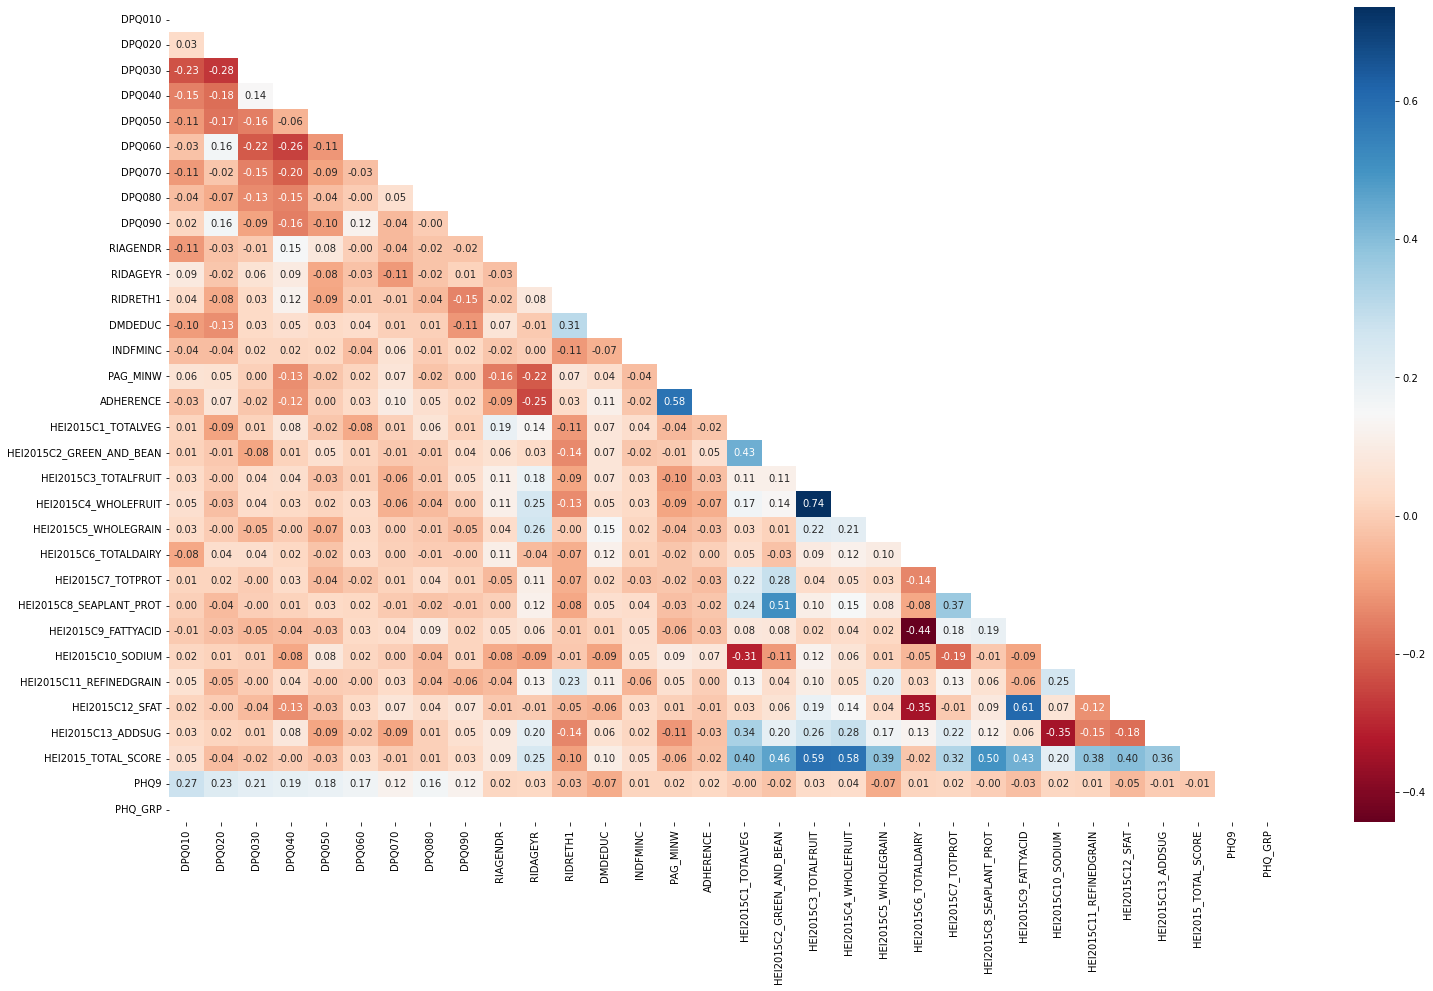

In [31]:
sns.set_context(font_scale = 3.0)
plt.figure(figsize = (25,15))
sns.heatmap(
    SINTOMAS_LEVES.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "RdBu",
    mask = np.triu(np.ones_like(SINTOMAS_LEVES.corr()))
)

plt.show()

# Grupo 2: Sintomas Moderados

In [32]:
SINTOMAS_MOD.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,1.460784,1.549020,1.862745,2.117647,1.348039,1.191176,1.151961,0.720588,0.259804,1.573529,45.578431,2.901961,2.857843,7.705882,290.162682,1.671569,3.085252,1.637155,2.262086,2.172699,1.642954,3.827398,4.436485,2.428654,4.433245,5.025230,6.052461,5.798620,5.696142,48.498382,11.661765,2.0
std,1.204847,1.051646,1.157875,1.116770,1.183402,1.258555,1.041714,1.038836,0.566862,0.495781,18.968440,1.153361,1.221477,12.941009,533.631925,0.885001,1.480675,2.105199,1.933500,2.129549,1.904099,1.510244,1.033979,2.134135,3.146822,3.361296,3.400152,3.312197,3.560717,11.599877,1.385466,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.631534,10.000000,2.0
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.920743,0.000000,0.292738,0.000000,0.000000,2.933709,4.141950,0.000000,1.729277,2.528725,3.468318,2.750435,2.648444,39.937107,10.000000,2.0
50%,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,46.000000,3.000000,3.000000,5.000000,95.842956,1.000000,3.142062,0.000000,2.049670,1.800090,0.614635,4.691370,5.000000,2.289217,3.934920,4.934313,6.615197,6.495708,6.047390,47.324376,12.000000,2.0
75%,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,59.250000,4.000000,4.000000,9.000000,325.635104,3.000000,4.377366,3.853622,4.240220,5.000000,3.217401,5.000000,5.000000,5.000000,6.746402,7.853579,9.322139,8.596973,9.214826,56.662826,13.000000,2.0
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,3.000000,2.000000,85.000000,5.000000,5.000000,99.000000,4115.150115,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,83.301306,14.000000,2.0


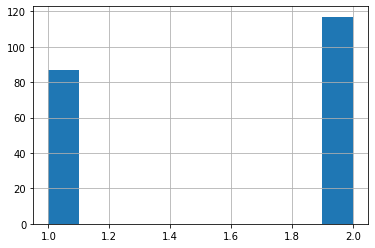

In [33]:
SINTOMAS_MOD.RIAGENDR.hist()
plt.show()

<AxesSubplot:>

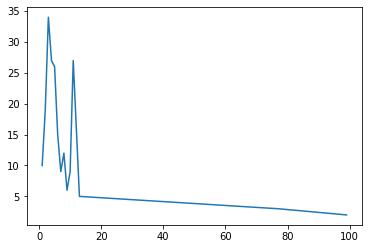

In [34]:
SINTOMAS_MOD["INDFMINC"].value_counts().sort_index().plot.line()

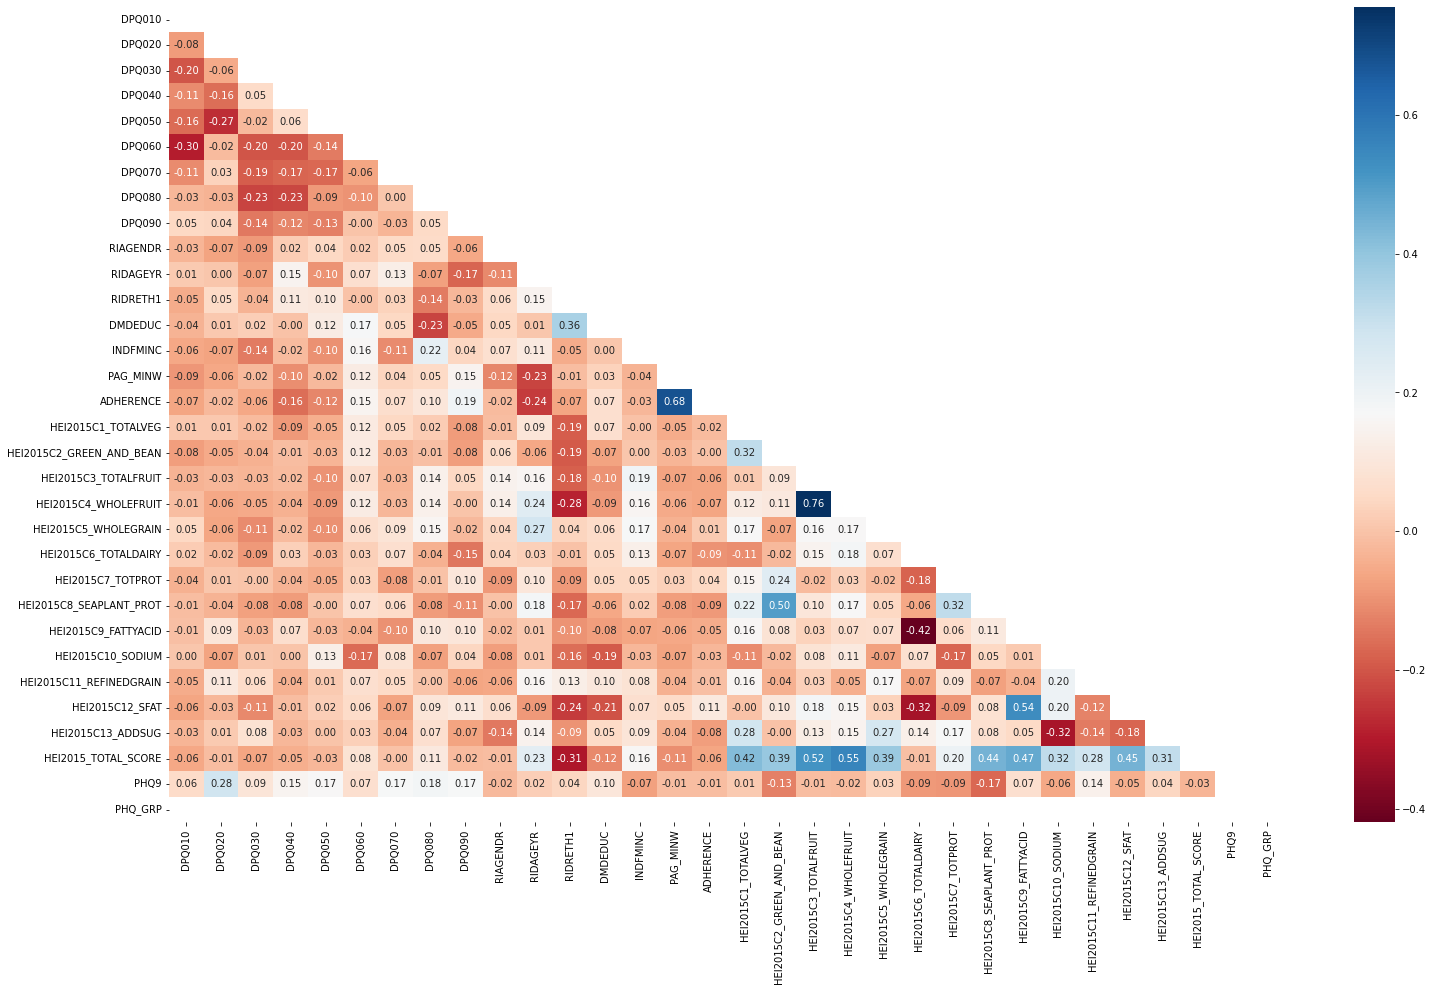

In [35]:
sns.set_context(font_scale = 3.0)
plt.figure(figsize = (25,15))
sns.heatmap(
    SINTOMAS_MOD.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "RdBu",
    mask = np.triu(np.ones_like(SINTOMAS_MOD.corr()))
)

plt.show()

# Grupo 3: Sintomas Moderadamente Severos

In [36]:
SINTOMAS_MODSV.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,2.155844,2.025974,2.584416,2.597403,2.025974,1.831169,1.636364,1.233766,0.584416,1.571429,45.974026,2.870130,2.961039,6.324675,238.238925,1.649351,2.904602,1.327133,2.413013,2.137881,1.312620,3.505470,4.213988,2.340601,4.121244,5.631645,6.167457,5.774892,5.132202,46.982746,16.675325,3.0
std,1.236133,0.972977,1.331310,1.029304,1.356990,1.043811,1.212968,1.588579,0.832729,0.498117,19.334299,1.162468,1.163497,11.047078,500.671394,0.839270,1.522155,1.972736,2.005707,2.158000,1.656962,1.719322,1.211885,2.181361,3.073079,3.692702,3.638196,3.330627,3.689382,10.834206,1.418316,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.323085,15.000000,3.0
25%,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,30.000000,2.000000,2.000000,3.000000,0.000000,1.000000,1.881220,0.000000,0.110816,0.000000,0.000000,2.188101,3.351431,0.000000,1.304650,2.662779,3.337184,3.053740,1.720314,39.996451,15.000000,3.0
50%,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,47.000000,3.000000,3.000000,5.000000,115.427252,1.000000,2.852562,0.000000,2.406529,1.696693,0.377526,4.230243,5.000000,1.950047,4.295086,6.168805,7.193782,6.270208,5.320716,45.494279,17.000000,3.0
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,59.000000,4.000000,4.000000,7.000000,281.755196,2.000000,4.281950,2.470513,4.443504,5.000000,2.186712,5.000000,5.000000,5.000000,6.286387,9.280864,9.723595,8.583636,8.942772,55.682016,18.000000,3.0
max,9.000000,3.000000,9.000000,9.000000,9.000000,3.000000,3.000000,9.000000,3.000000,2.000000,85.000000,5.000000,5.000000,99.000000,4033.995381,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,68.233403,19.000000,3.0


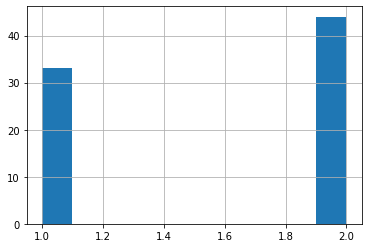

In [37]:
SINTOMAS_MODSV.RIAGENDR.hist()
plt.show()

<AxesSubplot:>

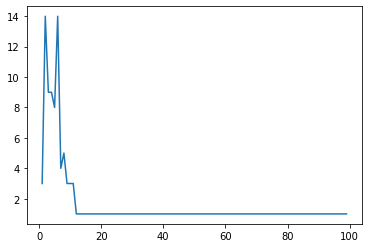

In [38]:
SINTOMAS_MODSV["INDFMINC"].value_counts().sort_index().plot.line()

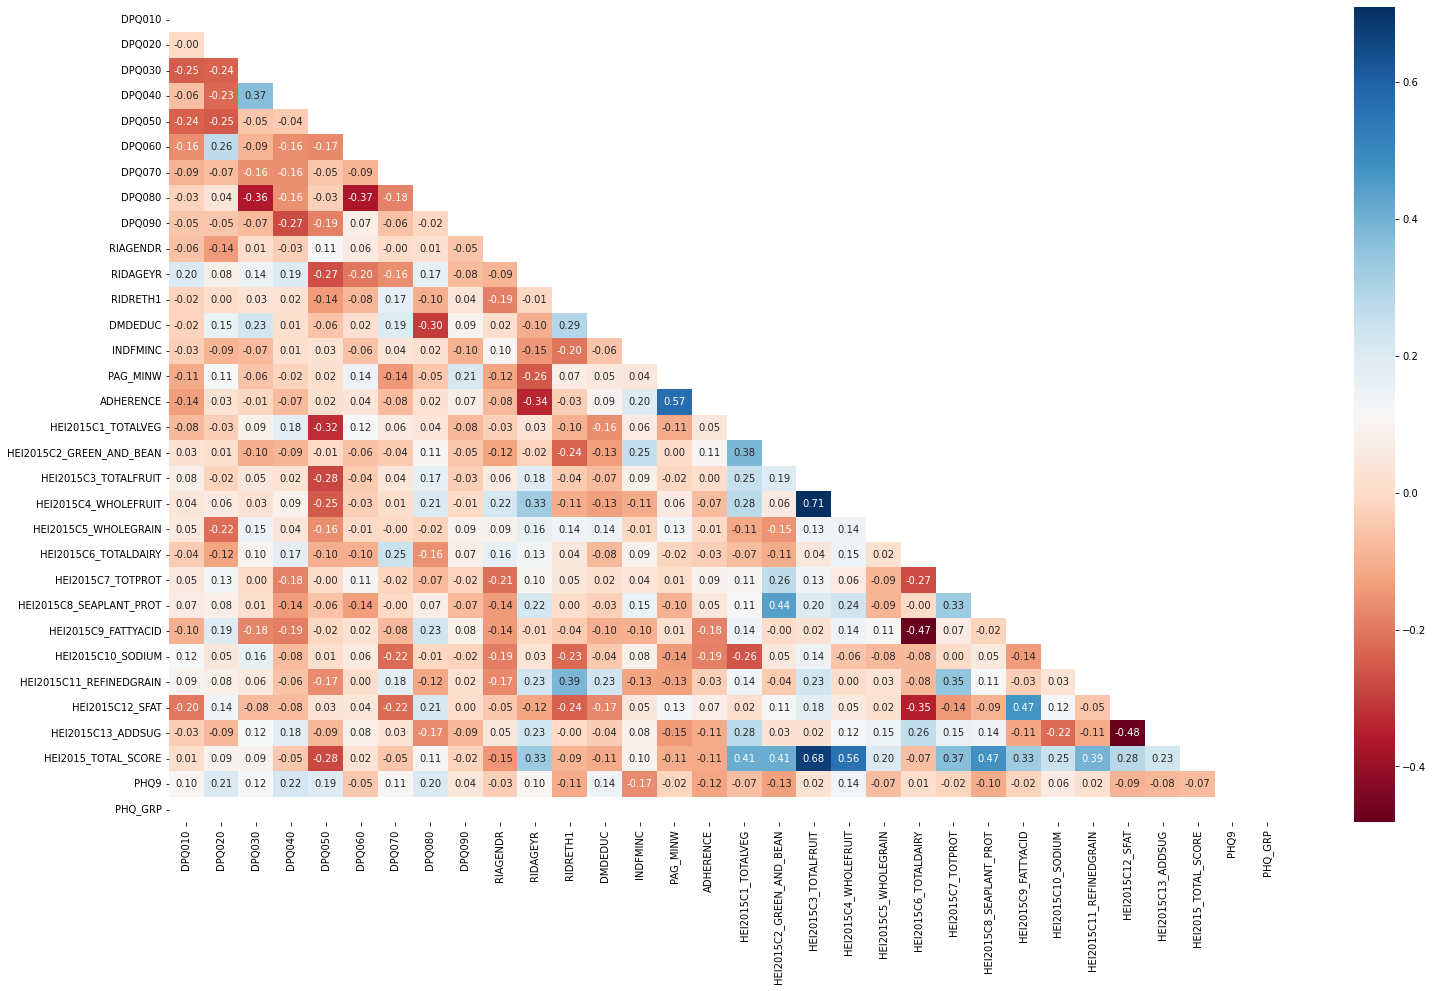

In [39]:
sns.set_context(font_scale = 3.0)
plt.figure(figsize = (25,15))
sns.heatmap(
    SINTOMAS_MODSV.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "RdBu",
    mask = np.triu(np.ones_like(SINTOMAS_MODSV.corr()))
)

plt.show()

# Grupo 4: Sintomas Severos

In [40]:
SINTOMAS_SV.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,8.389356,8.422969,8.439776,8.431373,8.358543,8.386555,8.389356,8.448179,8.330532,1.563025,45.957983,2.969188,2.890756,11.358543,376.712022,1.764706,3.221081,1.985829,2.484251,2.278357,1.641586,3.529932,4.439325,2.646938,4.820942,4.956129,5.563866,6.550707,6.318659,50.437603,75.596639,4.0
std,1.975183,1.895539,1.794150,1.826436,2.043149,1.952135,1.978025,1.921413,2.163926,0.496708,21.575082,1.266089,1.309794,19.973304,669.245888,0.890391,1.599305,2.230418,1.991974,2.197248,1.945924,1.769216,1.057492,2.221343,3.321382,3.548148,3.695748,3.087329,3.318521,12.276100,16.734201,0.0
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.878786,20.000000,4.0
25%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,27.000000,2.000000,2.000000,4.000000,0.000000,1.000000,1.991071,0.000000,0.413299,0.000000,0.000000,2.078066,4.256519,0.000000,2.236300,1.722950,2.047747,4.562613,4.205630,42.178683,81.000000,4.0
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,41.000000,3.000000,3.000000,6.000000,117.782910,1.000000,3.272480,0.492449,2.343417,1.696153,0.685518,4.538069,5.000000,2.760252,4.451553,5.044158,6.190528,6.857189,7.050584,49.881317,81.000000,4.0
75%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,63.000000,4.000000,4.000000,10.000000,415.704388,3.000000,5.000000,5.000000,4.952627,5.000000,3.343166,5.000000,5.000000,5.000000,7.543152,7.982012,9.371065,9.690025,9.614503,58.899082,81.000000,4.0
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000,5536.154734,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,85.848198,81.000000,4.0


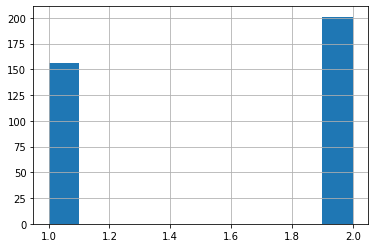

In [41]:
SINTOMAS_SV.RIAGENDR.hist()
plt.show()

<AxesSubplot:>

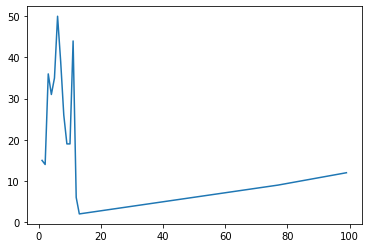

In [42]:
SINTOMAS_SV["INDFMINC"].value_counts().sort_index().plot.line()

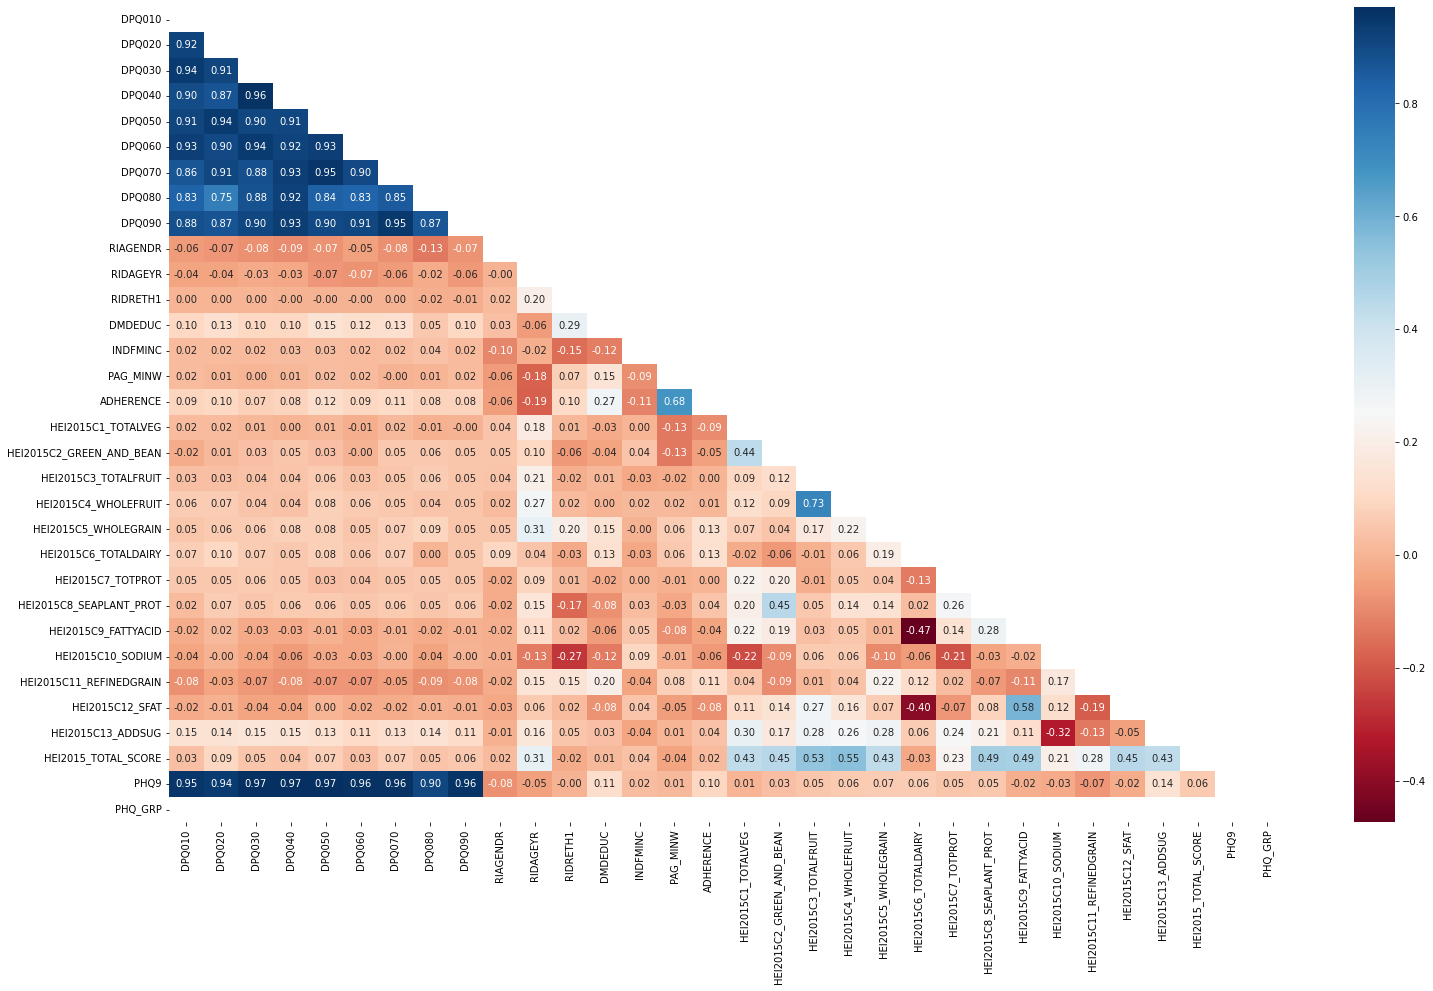

In [45]:
sns.set_context(font_scale = 3.0)
plt.figure(figsize = (25,15))
sns.heatmap(
    SINTOMAS_SV.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "RdBu",
    mask = np.triu(np.ones_like(SINTOMAS_SV.corr()))
)

plt.show()

# Conclusões

In [44]:
#A partir do tipo de modelo OBSERVACIONAL, podemos elencar algumas observações comuns dentro das classificações de sintomas.
# 1) sem sintomas; (2) sintomas leves; (3) sintomas moderados; (4) sintomas moderadamente severos; (5) sintomas severos.

#A primeira é que os sintomas de depressão afetam principalmente as mulheres. Ou seja, elas estão mais vulneráveis.
#Contudo, não foi encontrada uma correlação direta que indique que há relação unicamente com a alimentação.

#A segunda é que pessoas com sintomas de depressão LEVES, MODERADOS e MODERADOS SEVEROS possuem uma renda menor do que...
#... o grupo SEM SINTOMAS. Apesar de serem dados que não apresentaram correlação, podemos inferir que há impactos de...
#... renda na saúde mental das pessoas.

#A terceira é que pessoas com sintomas de depressão MODERADOS, MODERADOS SEVEROS e SEVEREOS possuem uma escolaridade...
#... menor do que o 9º ano ou entre o 9º e 12º anos. Como inferência, podemos dizer que quanto menor o grau de escolaridade...
#... maiores as chances dessa pessoa apresentar sintomas de depressão mais acentuados.

#Por fim, pessoas SEM SINTOMAS e com SINTOMAS LEVES estão mais inseridos no grupo de aderência ao Physical Activity...
#... Guideline (PAG) 2, com exercícios por um período adequado. Já o grupo com SINTOMAS MODERADOS, MODERADAMENTE SEVEROS...
#... e SEVEROS apresentam uma média mais próxima do 1, com baixo volume de exercícios.

#Isso pode indicar que não há somente uma variável que impacta/afeta as pessoas com depressão.
#Volume de exercícios físicos, grau de estudos e até mesmo a renda impactam a forma como essas pessoas vivem.
#Contudo, isso não indica necessariamente que são causalidades que fazem com que essas pessoas tenham depressão.
#Podem ser fatores sim que agravem os sintomas, mas não necessariamente os causadores da doença.